In [21]:
%matplotlib inline


# Diabetes dataset

Ten variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients.

age:- age in years
sex:-
bmi:- body mass index
bp:- average blood pressure
s1 tc:- T-Cells (a type of white blood cells)
s2 ldl:- low-density lipoproteins
s3 hdl:- high-density lipoproteins
s4 tch:- thyroid stimulating hormone
s5 ltg:- lamotrigine
s6 glu:- blood sugar level



In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Load the diabetes dataset

data = datasets.load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
target=pd.DataFrame(data= data['target'],
                     columns= ['sugar-level'])


In [23]:
df_new = pd.concat([df, target], axis=1)

In [24]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  sugar-level  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


Data habve been Uploaded in two dataframe'df_new' 


target columns os sugar-level that you need to predict

In [25]:
df_new.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,sugar-level
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


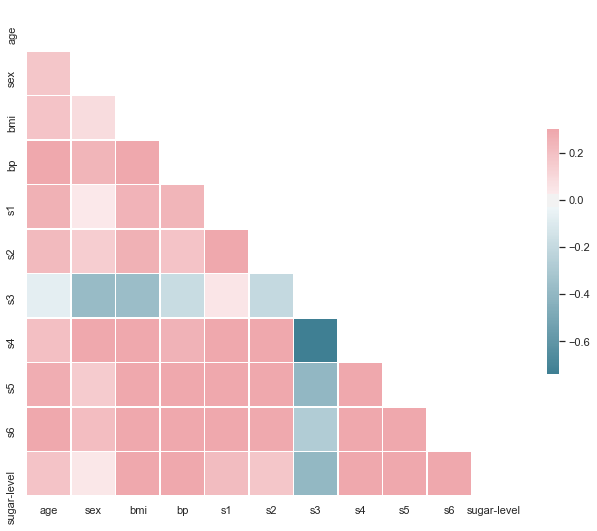

In [26]:
import seaborn as sns

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)


# Compute the correlation matrix
corr = df_new.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

remove one of two features that have a correlation higher than 0.9

In [27]:
corr_matrix = df_new.corr().abs()
corr_matrix

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,sugar-level
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,0.196455,0.659817,0.318353,0.290600,0.174054
s3,0.075181,0.379090,0.366811,0.178761,0.051519,0.196455,1.000000,0.738493,0.398577,0.273697,0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,0.273697,0.417212,0.464670,1.000000,0.382483


In [133]:
df_new.corr().style.background_gradient(cmap='coolwarm')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,sugar-level
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


s3 and s4 has high corelation need to drop one.We choose to drop s3 and the predictor

In [28]:
X=df_new.drop(columns=['s3','sugar-level'])

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s4      442 non-null    float64
 7   s5      442 non-null    float64
 8   s6      442 non-null    float64
dtypes: float64(9)
memory usage: 31.2 KB


In [30]:
y=df_new[['sugar-level']]
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sugar-level  442 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 362 to 52
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     89 non-null     float64
 1   sex     89 non-null     float64
 2   bmi     89 non-null     float64
 3   bp      89 non-null     float64
 4   s1      89 non-null     float64
 5   s2      89 non-null     float64
 6   s4      89 non-null     float64
 7   s5      89 non-null     float64
 8   s6      89 non-null     float64
dtypes: float64(9)
memory usage: 7.0 KB


In [34]:
# Initialize model
regression_model = linear_model.LinearRegression()

regression_model.fit(X_train, Y_train)

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

[152.53445084]
[[ -35.19099865 -243.52261505  562.55965871  304.90875025 -622.58930595
   296.40181645  156.81272567  718.13895788   43.29365349]]


In [35]:
regression_model.score(X = X_train, 
                       y = Y_train)

0.553913841129342

In [36]:
#test score
regression_model.score(X_test, y_test)

0.3316469808470983

Check for Outliers

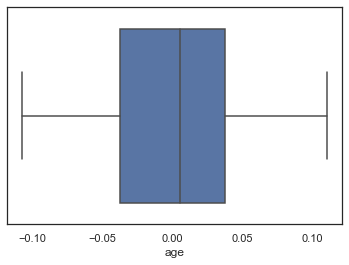

In [37]:
#Check outliers
import seaborn as sns
sns.boxplot(x=X['age'])

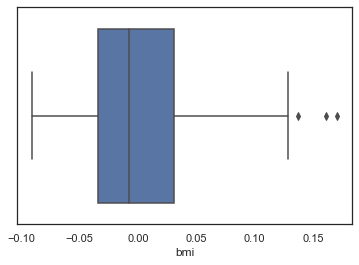

In [38]:
#Check outliers
import seaborn as sns
sns.boxplot(x=X['bmi'])

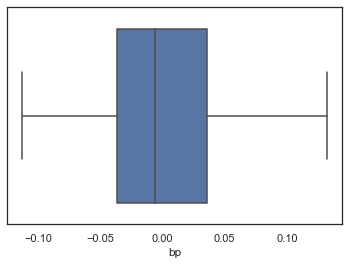

In [39]:
#Check outliers
import seaborn as sns
sns.boxplot(x=X['bp'])

In [45]:
Q1 = df_new.quantile(0.25)
Q3 = df_new.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age              0.075375
sex              0.095322
bmi              0.065477
bp               0.072300
s1               0.062606
s2               0.060203
s3               0.064429
s4               0.073802
s5               0.065682
s6               0.061096
sugar-level    124.500000
dtype: float64


In [46]:
print('Lower:\n',Q1 - 1.5 * IQR)
print('Upper:\n',Q3 + 1.5 * IQR)

Lower:
 age            -0.150362
sex            -0.187624
bmi            -0.132445
bp             -0.145107
s1             -0.128157
s2             -0.120663
s3             -0.131760
s4             -0.150197
s5             -0.131772
s6             -0.124823
sugar-level   -99.750000
dtype: float64
Upper:
 age              0.151139
sex              0.193663
bmi              0.129464
bp               0.144094
s1               0.122267
s2               0.120149
s3               0.125954
s4               0.145012
s5               0.130956
s6               0.119561
sugar-level    398.250000
dtype: float64


In [48]:

df_new[df_new["bmi"] > 0.129464]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,sugar-level
256,-0.049105,-0.044642,0.160855,-0.046985,-0.029088,-0.019790,-0.047082,0.034309,0.028017,0.011349,346.0
366,-0.045472,0.050680,0.137143,-0.015999,0.041086,0.031880,-0.043401,0.071210,0.071022,0.048628,233.0
367,-0.009147,0.050680,0.170555,0.014987,0.030078,0.033759,-0.021311,0.034309,0.033657,0.032059,242.0


In [52]:
#deleting outliers
X_out = df_new[~((df_new < (Q1 - 1.5 * IQR)) |
                                    (df_new > (Q3 + 1.5 * IQR))).any(axis=1)]

In [53]:
X_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409 entries, 0 to 440
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          409 non-null    float64
 1   sex          409 non-null    float64
 2   bmi          409 non-null    float64
 3   bp           409 non-null    float64
 4   s1           409 non-null    float64
 5   s2           409 non-null    float64
 6   s3           409 non-null    float64
 7   s4           409 non-null    float64
 8   s5           409 non-null    float64
 9   s6           409 non-null    float64
 10  sugar-level  409 non-null    float64
dtypes: float64(11)
memory usage: 38.3 KB


In [58]:
#Iteration 2
X=df_new.drop(columns=['s3','sugar-level'])

In [59]:
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s4      442 non-null    float64
 7   s5      442 non-null    float64
 8   s6      442 non-null    float64
dtypes: float64(9)
memory usage: 31.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sugar-level  442 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, y_test = train_test_split(scaled_df, y, test_size=0.2, random_state=0)

In [61]:
# Initialize model
regression_model = linear_model.LinearRegression()

regression_model.fit(X_train, Y_train)

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

[152.53445084]
[[ -1.67386511 -11.58318957  26.75823422  14.50303026 -29.61355336
   14.09839669   7.45882073  34.15838683   2.0592691 ]]


In [62]:
regression_model.score(X = X_train, 
                       y = Y_train)

0.553913841129342

In [63]:
#test score
regression_model.score(X_test, y_test)

0.3316469808470983

In [64]:
# Regularization techniqiyes
#L1, L2

In [155]:
#Ridge Regression
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.01)

ridge_reg.fit(X_train,Y_train)

ridge_reg.score(X = X_train, y = Y_train)

0.5539138352169819

In [157]:
ridge_reg.score(X = X_test, y = y_test)

0.33165113677256874

In [158]:
train_prediction = ridge_reg.predict(X_train)
train_prediction

array([[145.99899079],
       [100.15051105],
       [123.26294624],
       [ 77.72978089],
       [148.74449927],
       [126.18837207],
       [106.83516071],
       [235.31840623],
       [225.01205899],
       [126.19929418],
       [161.0718472 ],
       [196.4144952 ],
       [111.57187772],
       [201.17469325],
       [ 86.75561353],
       [214.42899535],
       [110.2614347 ],
       [221.25437712],
       [262.21505225],
       [114.77974888],
       [113.76659401],
       [193.08675052],
       [121.35497263],
       [166.7821892 ],
       [ 98.70753507],
       [100.10602462],
       [222.86516317],
       [236.61584887],
       [117.79536881],
       [293.22574716],
       [116.06690423],
       [126.98229744],
       [113.48819535],
       [ 70.04385624],
       [246.35214748],
       [100.66888298],
       [120.74622659],
       [201.91833545],
       [187.27200644],
       [194.55293222],
       [160.02672926],
       [190.96613272],
       [116.22983033],
       [173

In [159]:
from sklearn.metrics import mean_squared_error
mean_squared_error(train_prediction, Y_train)

2734.8193968744445

In [ ]:
#Optimizing Ridge Regression on  mean_squarred_error using GridSearchCV

In [151]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,Y_train)



-2865.756756962929

In [152]:
ridge_regressor.best_params_

{'alpha': 0.01}

In [153]:
ridge_regressor.best_score_

-2865.756756962929

In [163]:
#Lasso
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.01)

lasso_reg.fit(X_train,Y_train)

lasso_reg.score(X = X_train, y = Y_train)

0.5539127107776467

In [164]:
lasso_reg.score(X = X_test, y = y_test)

0.3316838351619289

In [165]:
train_prediction = lasso_reg.predict(X_train)
train_prediction

array([145.968728  , 100.08212103, 123.24464439,  77.86687277,
       148.73799009, 126.15586295, 106.8603792 , 235.27798334,
       225.03501086, 126.21268586, 161.06676842, 196.30249001,
       111.5532591 , 201.35518268,  86.75679328, 214.47160544,
       110.29090586, 221.27724834, 262.27254199, 114.74713317,
       113.78760008, 193.00968323, 121.24550052, 166.96605885,
        98.65098769, 100.20940974, 222.81433333, 236.5972837 ,
       117.74931356, 293.19136488, 116.03249425, 126.91633071,
       113.50327738,  70.18211017, 246.25784289, 100.64366001,
       120.75274846, 201.94756935, 187.18436234, 194.52180404,
       160.05201668, 190.9673046 , 116.28122358, 172.95661736,
       156.07342146,  78.9642965 , 183.55806688, 261.37842517,
        92.1991148 ,  76.10865993, 109.26645089,  99.49546024,
       253.45619694, 165.98706387,  98.21888571, 113.61493844,
       104.18484654,  61.42542495, 105.74463436, 154.19164441,
       114.66393887, 190.28391353, 150.85668466, 247.53

In [166]:
from sklearn.metrics import mean_squared_error
mean_squared_error(train_prediction, Y_train)

2734.8262904720214

In [176]:
# Check trained model y-intercept
print(lasso_reg.intercept_)

# Check trained model coefficients
print(lasso_reg.coef_)

[152.52976796]
[ -1.65731604 -11.55319974  26.77888683  14.48726353 -29.31960237
  13.79532359   7.55779689  34.02127461   2.05064862]


In [185]:
Lasso_coef = pd.DataFrame({
 'Lasso':lasso_reg.coef_},
 index=X_train.columns)
Lasso_coef

,Lasso
age,-1.657316
sex,-11.553200
bmi,26.778887
bp,14.487264
s1,-29.319602
s2,13.795324
s4,7.557797
s5,34.021275
s6,2.050649


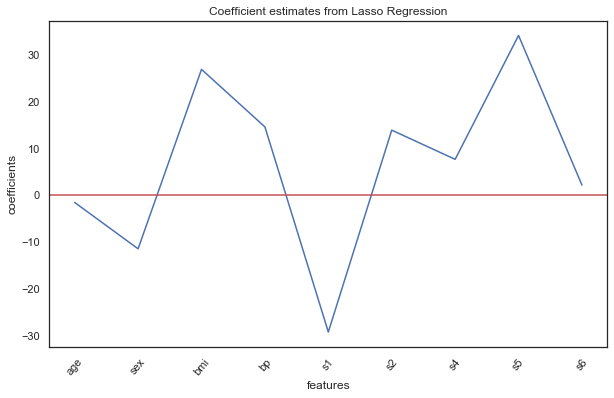

In [178]:
plt.figure(figsize=(10,6))
plt.plot(range(len(X_train.columns)),lasso_reg.coef_)
plt.axhline(0, color='r', linestyle='solid')
plt.xticks(range(len(X_train.columns)),X_train.columns,rotation=50)
plt.title("Coefficient estimates from Lasso Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

In [ ]:
#Optimizing Lasso Regression on  mean_squarred_error using GridSearchCV

In [160]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)
lasso_regressor.fit(X, y)



C:\Users\AKSHANSH\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 273549.87958051474, tolerance: 176.24972340425532
  positive)
C:\Users\AKSHANSH\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 248558.71796706654, tolerance: 175.5447039007092
  positive)
C:\Users\AKSHANSH\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 225392.04800982855, tolerance: 172.3429081560284
  positive)
C:\Users\AKSHANSH\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of itera

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [161]:
lasso_regressor.best_params_ 

{'alpha': 0.01}

In [162]:
lasso_regressor.best_score_

-2865.606363017896

In [174]:
#elasticnet
from sklearn.linear_model import ElasticNet

en_reg = ElasticNet(alpha=0.01,l1_ratio=0.8)

en_reg.fit(X_train,Y_train)

en_reg.score(X = X_train, y = Y_train)

0.5538793939536693

In [175]:
en_reg.score(X = X_test, y = y_test)

0.3319472595221947

In [99]:
#prediction


train_prediction = lasso_reg.predict(X_train)
train_prediction

array([147.56716187,  92.25022095, 124.48075128,  92.40472897,
       153.18079931, 123.61383705, 108.69317448, 229.33354945,
       226.46453353, 129.10541733, 164.18919668, 185.03102425,
       109.01546472, 211.90904702,  90.08132532, 217.8573647 ,
       118.45484676, 220.80844473, 264.25428057, 112.73131877,
       116.98010495, 189.523933  , 113.17082969, 176.08554152,
        96.13098514, 109.21082045, 218.24501598, 233.6577338 ,
       115.68895144, 285.48958031, 115.54094797, 125.27792751,
       116.73939052,  77.63480665, 234.0177147 , 101.03363542,
       123.46016845, 202.41775906, 179.17418914, 190.09274979,
       166.65486345, 191.30080504, 118.36228896, 167.94634606,
       155.78550478,  76.72222396, 180.81484644, 267.60380307,
        99.26251493,  72.98859716, 110.56614207,  97.36962606,
       251.87607249, 164.40183557, 101.62423342, 108.70159048,
       104.8458931 ,  67.04426057, 108.1218546 , 150.17088422,
       118.4211556 , 185.64162392, 143.16545308, 242.14

In [100]:
Y_train

,sugar-level
74,85.0
26,137.0
45,53.0
389,51.0
154,197.0
...,...
323,248.0
192,91.0
117,281.0
47,142.0


In [101]:
from sklearn.metrics import mean_squared_error
mean_squared_error(train_prediction, Y_train)

2771.682654447967

In [ ]:
#Optimizing Elastic Net

In [170]:
alpha_values = {'alpha':[0.00005,0.0005,0.001, 0.01, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100],
 'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1]}
elastic= GridSearchCV(ElasticNet(), alpha_values, scoring='neg_mean_squared_error', cv=10 )

In [172]:
elastic.fit(X_train,Y_train).best_params_

{'alpha': 0.01, 'l1_ratio': 0.8}

In [173]:
elastic.fit(X_train,Y_train).best_score_

-2874.715598070384

# Polynomial Regression

In [120]:
# Initialize model
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(2)

X = X_train # predictors
y = Y_train  # Target value

X_poly = poly_reg.fit_transform(X)

In [121]:
poly_model = linear_model.LinearRegression()
poly_model.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [122]:
# Check R-squared
poly_model.score(X_poly,y)


0.6242850749133686

In [123]:
X_test_poly = poly_reg.fit_transform(X_test)
poly_model.score(X = X_test_poly, y = y_test)

0.28647277062268084

In [124]:
# Check trained model y-intercept
print(poly_model.intercept_)

# Check trained model coefficients
print(poly_model.coef_)

[7.56440904e+13]
[[ 9.12041730e-12  1.26790448e+00  9.60315486e+12  2.31742160e+01
   1.44806301e+01 -5.01990260e+01  3.89316714e+01  4.82482247e-01
   4.75759516e+01  9.63623047e-01  4.40692139e+00  9.43141174e+00
   4.42260742e-01 -7.37121582e-01  1.63809814e+01 -2.22454834e+01
  -5.39672852e-01  1.88964844e-01  5.52099609e+00 -7.56440904e+13
   4.34628296e+00  2.58911133e+00  1.31174316e+01 -9.40661621e+00
  -2.88220215e+00 -4.82254028e+00  1.21679688e+00  1.30297852e+00
   6.99896240e+00 -9.29394531e+00  7.02929688e+00  7.55859375e-01
   4.75012207e+00 -4.90649414e+00  4.95788574e-01  3.97485352e+00
   1.13500977e+00 -2.72656250e+00 -5.73168945e+00 -3.57250977e+00
   8.39062500e+00 -2.32312012e+01  5.38598633e+00 -3.12238770e+01
   2.99658203e+00  1.28837891e+01 -1.16730957e+01  3.95854492e+01
  -2.31298828e+00  7.46337891e+00 -1.95280762e+01  1.66607666e+00
   1.88388672e+01 -1.27453613e+00  4.69238281e+00]]


In [129]:
# Degree=3
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(3)

X = X_train # predictors
y = Y_train  # Target value

X_poly = poly_reg.fit_transform(X)

In [130]:
poly_model = linear_model.LinearRegression()
poly_model.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
# Check R-squared
poly_model.score(X_poly,y)

-0.23124498368312518

In [132]:
X_test_poly = poly_reg.fit_transform(X_test)
poly_model.score(X = X_test_poly, y = y_test)

-8.80703338631334

Score is depreciating with high polynomial degree

# Best Model:
Lasso = 0.01
Score_train = 0.5539
Score Test = 0.3316
MSE = -2865.6


In [186]:
Lasso_coef = pd.DataFrame({
 'Lasso':lasso_reg.coef_},
 index=X_train.columns)
Lasso_coef

,Lasso
age,-1.657316
sex,-11.553200
bmi,26.778887
bp,14.487264
s1,-29.319602
s2,13.795324
s4,7.557797
s5,34.021275
s6,2.050649


In [191]:
Lasso_intercept = pd.DataFrame({"intercept":[152.52], 
                  }) 
Lasso_intercept

,intercept
0,152.52
